In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.metrics import pairwise
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [46]:
utilities_df = pd.read_csv("C:/Users/sekha/Desktop/BUSI 650 SP22/Utilities.csv")
# set row names to the utilities column
utilities_df.set_index('Company', inplace=True)
# while not required, the conversion of integer data to float
# will avoid a warning when applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
utilities_df
# compute Euclidean distance
#d = pairwise.pairwise_distances(utilities_df, metric='euclidean')
#pd.DataFrame(d, columns=utilities_df.index, index=utilities_df.index)

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044
Florida,1.32,13.5,111.0,60.0,-2.2,11127.0,22.5,1.241
Hawaiian,1.22,12.2,175.0,67.6,2.2,7642.0,0.0,1.652
Idaho,1.10,9.2,245.0,57.0,3.3,13082.0,0.0,0.309
Kentucky,1.34,13.0,168.0,60.4,7.2,8406.0,0.0,0.862


In [48]:
#code for normalizing data and computing distance
# scikit-learn uses population standard deviation
#utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)
# pandas uses sample standard deviation
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()
# compute normalized distance based on Sales and Fuel Cost
utilities_df_norm

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.293,-0.685,-0.417,-0.578,-0.526,0.046,-0.715,-0.854
Boston,-1.215,-0.194,0.821,0.207,-0.334,-1.078,0.792,0.813
Central,1.712,2.078,-1.340,-0.892,0.051,0.084,-0.715,-0.080
Commonwealth,-0.510,0.207,-0.004,-0.219,-0.943,-0.702,1.328,-0.724
NY,2.037,-0.863,0.578,-1.295,-0.719,-1.581,0.214,1.693
Florida,1.116,1.232,-1.388,0.678,-1.745,0.623,0.625,0.249
Hawaiian,0.574,0.652,0.166,2.381,-0.334,-0.358,-0.715,0.988
Idaho,-0.076,-0.685,1.865,0.005,0.019,1.174,-0.715,-1.427
Kentucky,1.224,1.009,-0.004,0.767,1.270,-0.143,-0.715,-0.433


In [49]:
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [50]:
y_predicted=km.fit_predict(utilities_df_norm)
y_predicted

array([0, 3, 0, 2, 4, 0, 3, 1, 0, 2, 1, 3, 2, 0, 3, 1, 3, 0, 0, 2, 3, 2])

In [51]:
utilities_df_norm['cluster']=y_predicted
utilities_df_norm.head(50)

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
Company,,,,,,,,,
Arizona,-0.293,-0.685,-0.417,-0.578,-0.526,0.046,-0.715,-0.854,0
Boston,-1.215,-0.194,0.821,0.207,-0.334,-1.078,0.792,0.813,3
Central,1.712,2.078,-1.340,-0.892,0.051,0.084,-0.715,-0.080,0
Commonwealth,-0.510,0.207,-0.004,-0.219,-0.943,-0.702,1.328,-0.724,2
NY,2.037,-0.863,0.578,-1.295,-0.719,-1.581,0.214,1.693,4
Florida,1.116,1.232,-1.388,0.678,-1.745,0.623,0.625,0.249,0
Hawaiian,0.574,0.652,0.166,2.381,-0.334,-0.358,-0.715,0.988,3
Idaho,-0.076,-0.685,1.865,0.005,0.019,1.174,-0.715,-1.427,1
Kentucky,1.224,1.009,-0.004,0.767,1.270,-0.143,-0.715,-0.433,0


In [52]:
km.cluster_centers_

array([[ 0.50431607,  0.77955087, -0.98589607, -0.33754635, -0.48957692,
         0.35186001, -0.52321083, -0.41053676],
       [-0.60027572, -0.83317996,  1.33891013, -0.48058022,  0.99171778,
         1.85652137, -0.71462942, -0.96576599],
       [-0.01133215,  0.33138146,  0.21893388, -0.35804075,  0.16646865,
        -0.40187377,  1.56503844, -0.59544762],
       [-0.61834147, -0.62522256,  0.20194002,  1.14829804,  0.05636417,
        -0.74029782, -0.37220283,  1.17594257],
       [ 2.03732429, -0.86288816,  0.57823262, -1.29501935, -0.71864311,
        -1.58142837,  0.21438883,  1.692638  ]])

In [53]:
# Cluster membership
memb = pd.Series(km.labels_, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
     print(key, ': ', ', '.join(item.index))

0 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
1 :  Idaho, Nevada, Puget
2 :  Commonwealth, Madison , Northern, Wisconsin, Virginia
3 :  Boston , Hawaiian , New England, Pacific , San Diego, United
4 :  NY


In [65]:
#centroids = pd.DataFrame(km.cluster_centers_, columns=utilities_df_norm.columns)

#pd.set_option('precision', 3)
#centroids

In [26]:
# calculate the distances of each data point to the cluster centers
distances = km.transform(utilities_df_norm)
# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2
# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': km.labels_},
    index=utilities_df_norm.index)
# group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (1 members): 0.00 within cluster 
Cluster 1 (5 members): 16.91 within cluster 
Cluster 2 (3 members): 9.53 within cluster 
Cluster 3 (7 members): 26.51 within cluster 
Cluster 4 (6 members): 14.92 within cluster 


In [27]:
pd.DataFrame(pairwise.pairwise_distances(km.cluster_centers_, metric='euclidean'))

,0,1,2,3,4
0,0.000,4.007,5.557,4.143,3.861
1,4.007,0.000,4.119,3.371,3.225
2,5.557,4.119,0.000,3.748,3.720
3,4.143,3.371,3.748,0.000,2.726
4,3.861,3.225,3.720,2.726,0.000


In [66]:
#centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
#plt.figure(figsize=(10,6))
#parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [62]:
k_ran=range(1,20)
sse=[]
for k in k_ran:
    km=KMeans(n_clusters=k)
    km.fit(utilities_df_norm)
    sse.append(km.inertia_)

C:\Users\sekha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [63]:
sse

[205.3181818181818,
 143.79257951582824,
 109.53001406615748,
 81.24033928712336,
 71.74484963468807,
 59.70637639602405,
 49.15098389739132,
 45.00724737721395,
 35.50767968208256,
 32.92219113578087,
 27.469723607053393,
 23.668487566519424,
 19.09708668333917,
 15.71873010314962,
 12.733515820466522,
 9.542561767714485,
 8.094725404592534,
 5.357325577766225,
 3.7075533192085555]

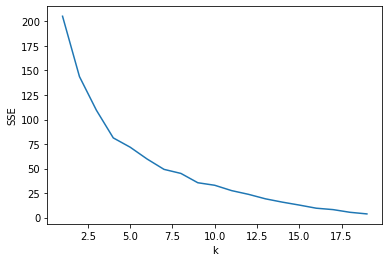

In [64]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_ran,sse)           

In [67]:
#inertia = []# sum of square error
#for n_clusters in range(1, 7):
  #  km = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
   # inertia.append(km.inertia_ / n_clusters)
#inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
#ax = inertias.plot(x='n_clusters', y='inertia')
#plt.xlabel('Number of clusters (k)')
#plt.ylabel('Average Within-Cluster Squared Distances')
#plt.ylim((0, 1.1 * inertias.inertia.max()))
#ax.legend().set_visible(False)
#plt.show()